# Énoncé

*(Capytale : 334a-90136)* Vous avez à votre disposition la variable `mults` qui pointe vers le tableau de fonctions `[mult0, mult1, ...]`. Chacune de ces fonctions est une  implémentation de la multiplication qui prend en argument deux entiers `x` et `y` et renvoie leurs produit.

**Exécute** le bloc de code ci-dessous qui :

- importe le tableau `mults`,
- affecte à la variable `mult` la première fonction `mult0` du tableau,
- affiche le résultat du calcul de $3 \times 5$ par cette fonction.

In [4]:
from travail import mults
mult = mults[0]
print( mult(3,5) )

15


0. **D'après toi**, la fonction `mults[0]` semble-t-elle correcte? Avant de répondre, essaye avec un nombre négatif... ;)
1. **Propose** une fonction `test(mult: function, x: int, y: int)` qui vérifie la correction de la fonction `mult` avec les arguments `x` et `y`. Par exemple, pour tester le produit 3×5 avec la 3ème fonction du tableau `mutls` on écrira l'instruction `test(mults[2], 3, 5)`.
2. *(bonus)* Propose une fonction `tests_aleatoire(mult: function)` qui effectue 100 tests sur des nombres aléatoires de `-100..100`
3. **Propose** ensuite des tests de performances.

# Réponses

*bloc de texte de réponses*

In [22]:
# bloc de code de réponses

# Correction

La fonction mults[0] est **incorrecte** : elle effectue la multiplication mais fait des erreurs de signes avec les nombres négatifs.

In [16]:
def test(mult, x, y):
    assert mult(x, y) == x * y
    assert mult(y, x) == x * y
    assert mult(0, x) == 0
    assert mult(x, 0) == 0
    assert mult(1, x) == x
    assert mult(x, 1) == x


In [79]:
# test correct
test(mults[0], 3, 5)

15

In [77]:
# test incorrect
test(mults[0], -3, 5)

AssertionError: 

In [33]:
from random import randint
def tests_aleatoires(mult):
    for _ in range(1_000):
        x = randint(-100, 100)
        y = randint(-100, 100)
        test(mult, x, y)

tests_aleatoires(mults[2])

On propose dans la suite une fonction qui teste les performances (complexité temporelle) en fonction de `n` le nombre de chiffres de `x` et de `y`.

On prend par exemple des valeurs de `n` qui doublent à chaque étape. Pour construire des nombres aléatoires de `n` chiffres on tire au hasard entre $10^{n-1}$ et $10^n -1$.

In [74]:
# affichage simple des valeurs 
# quand n est ×2, la durée est ×4

from time import time
from random import randint

for k in range(1,16):
    n = 2 ** k
    min = 10**(n-1)
    max = 10**n     - 1
    x = randint(min, max)
    y = randint(min, max)
    t = time()
    z = mults[4](x, y)
    duree = time() - t
    print(n, duree)

2 5.4836273193359375e-06
4 6.67572021484375e-06
8 1.1682510375976562e-05
16 2.1696090698242188e-05
32 3.790855407714844e-05
64 6.866455078125e-05
128 0.00010442733764648438
256 0.0002503395080566406
512 0.0006775856018066406
1024 0.002157449722290039
2048 0.010970115661621094
4096 0.03624606132507324
8192 0.11714816093444824
16384 0.39868927001953125
32768 1.6218297481536865


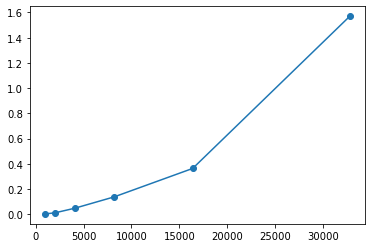

In [76]:
# Affichage du nuage de points

import matplotlib.pyplot as plt 

X = []
Y = []

for k in range(10,16):
    n = 2 ** k
    min = 10**(n-1)
    max = 10**n     - 1
    x = randint(min, max)
    y = randint(min, max)
    t = time()
    z = mults[4](x, y)
    duree = time() - t
    X.append(n)
    Y.append(duree)

plt.plot(X,Y)
plt.scatter(X, Y)

plt.show()